<a href="https://colab.research.google.com/github/BithikaHalder/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification**

1. Gather Data : using Bing downloader

In [1]:
!pip install bing_image_downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("sky",limit=30,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/sky


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/Jek0W7SVdek/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/49/b4/9d/49b49d7bf391b0f3f2493244bcdea027.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://motionarray-portfolio.imgix.net/portfolio-1724/cover-2-media-1557093708.jpg?w=3000&amp;q=60&amp;fit=max&amp;auto=format
[%] File Downloaded !

[%] Downloading Image #4 from http://th05.deviantart.net/fs71/PRE/f/2010/263/2/8/true_blue_sky_by_hermio-d2z3w35.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/KwHRAztzJMs/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://img.fotocommunity.com/true-colors-in-the-sky-8f0faa84-6cfe-4ab2-8a27-530c50914974.jpg?height=1080
[%] File Downloaded !

[%] Downloading Image #7 from https://live.staticflickr.com/4428/36312671

In [4]:
downloader.download("grass",limit=30,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/grass


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.andycain.org/uploads/8/3/6/7/83679422/green-grass_orig.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.tried-and-true.com/wp-content/uploads/2012/01/dreamstimefree_779085.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://d1231c29xbpffx.cloudfront.net/store/product/155429/image/large-8dbe945362208c3a3051d18d25a68307.jpg?Expires=1594933347&amp;Signature=b~cvFGnjTjUqq7i-rHvl53pQnKz9T92ekT42uHmHn9FK-DsKM4~19kLByYhNPgXrjmuUn9RRCnd9l5DkEpoBoBxDKefpBjrUBLlUoFqQ69yy~TMBoh9a~gF4hLLtTST4WcLiYRtpdxiX44WpM3Kua4gnHWOlU3NhJ~gLVE6g1K3X4kbKoLIUZenbCzM4KPcfqflFj5~arUCIMrnN4tGwlj9xu4RI~glx8-zgpIXeTqKm824a8Pi~KbzFSrhZBJFoMYIoHwJjsNms2dWYDpCCYM6mFK7wjeubpwIJ4X8Z0aj8HvW3REaY-VWcr7xnYrDWl7gMOAOMTmSE0d7ax3XWpQ__&amp;Key-Pair-Id=APKAIN6COYBF3ZQW7OQQ
[%] File Downloaded !

[%] Downloading Image #4 from https://s-media-cache-ak0.pi

In [5]:
downloader.download("cow",limit=30,output_dir='images',
                    adult_filter_off=True)

[%] Downloading Images to /content/images/cow


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-aViuCJ43CWw/TV-O7ORb8TI/AAAAAAAAA2M/qZbMsZc2kQ8/s1600/cowd.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s24990.pcdn.co/wp-content/uploads/2017/06/happy-cow-2.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://fraservalleyacreagelife.com/wp-content/uploads/2017/12/cows-2940686_960_720.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/cf/bc/8d/cfbc8dce840e73b09948aed4f652f3f8.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.farmercoop.com/wp-content/uploads/2016/09/1_cow_calf_big.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/-CXFfl9luHPM/TV-Os6opQfI/AAAAAAAAA2E/oCgrgvWqzrY/s1600/cow.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://trueinspiringstories.com/wp-content/uploads/2018/11/Highland

2. Preprocessing : (i) Resize (ii) Flatten

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['sky','grass','cow']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

3. Hyperparameter Tuning : applying classification algorithm using GridSearch CV

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                 test_size=0.3,random_state=109)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

4. Evaluate : using Confusion Matrix 

In [11]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 1])

In [12]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
accuracy_score(y_pred,y_test)

0.7407407407407407

In [15]:
confusion_matrix(y_pred,y_test)

array([[8, 1, 2],
       [0, 8, 2],
       [0, 2, 4]])

5. Predict : testing for brand new image

In [16]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [20]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/A_sunflower.jpg/450px-A_sunflower.jpg
(600, 450, 3)
 PREDICTED OUTPUT: grass


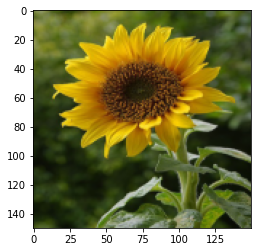

In [22]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your urlhttps://upload.wikimedia.org/wikipedia/commons/d/d8/Clear_Blue_Sky.jpg
(1536, 2048, 3)
 PREDICTED OUTPUT: sky


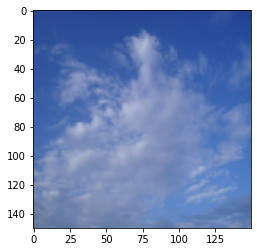

In [24]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your urlhttps://upload.wikimedia.org/wikipedia/commons/0/0c/Cow_female_black_white.jpg
(1680, 2190, 3)
 PREDICTED OUTPUT: cow


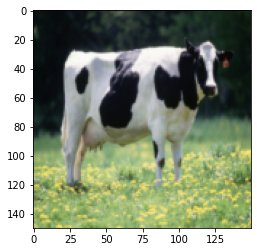

In [25]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')